# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

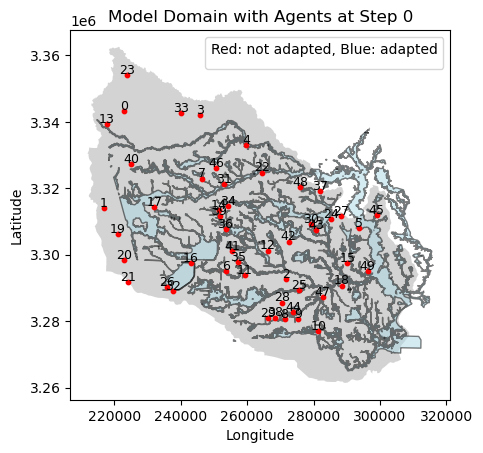

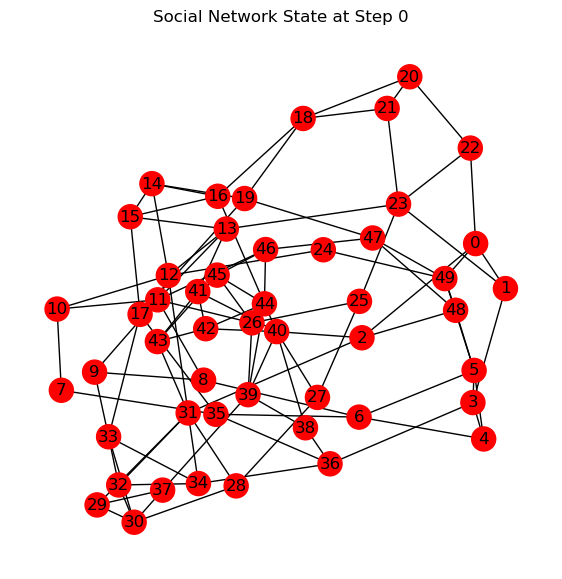

<Figure size 1000x600 with 0 Axes>

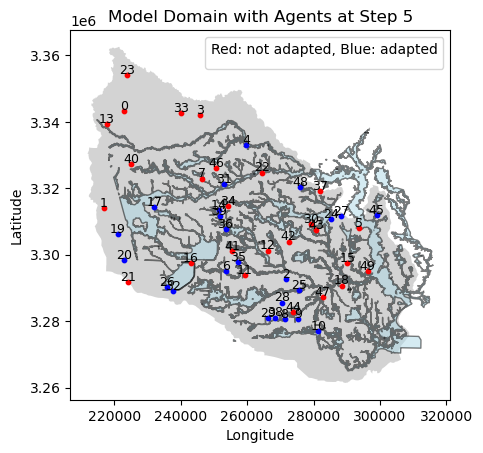

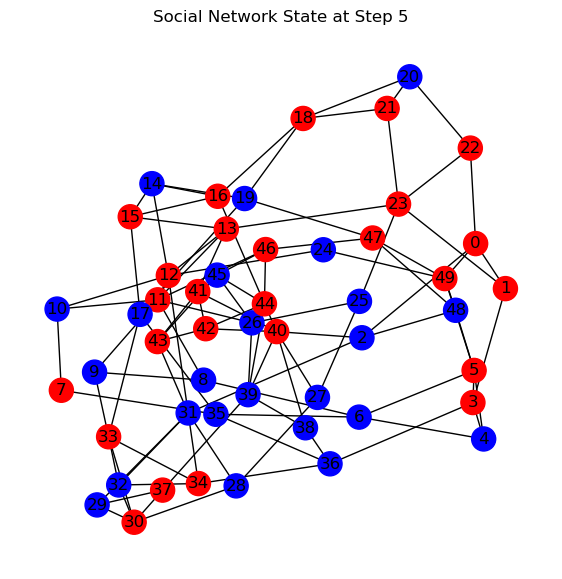

<Figure size 1000x600 with 0 Axes>

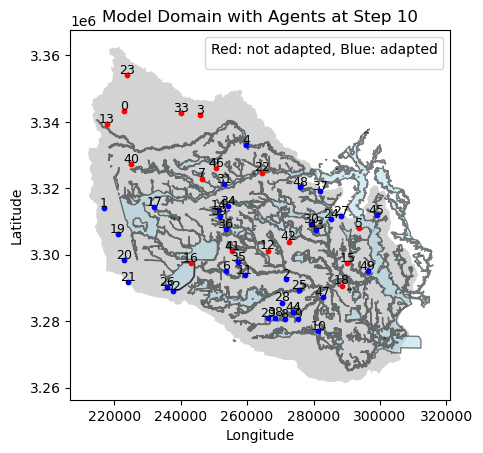

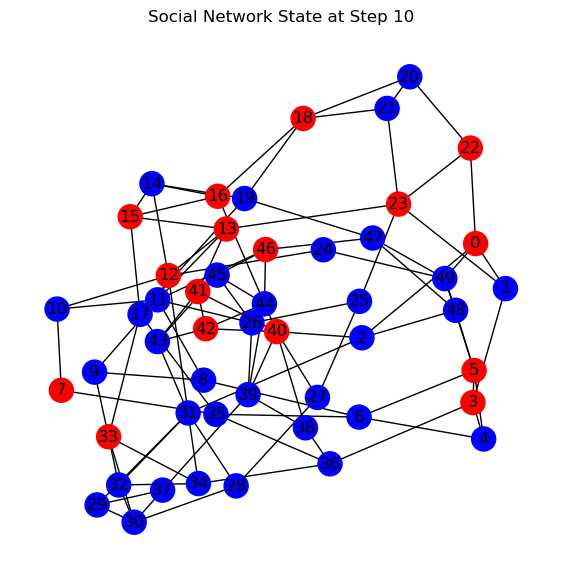

<Figure size 1000x600 with 0 Axes>

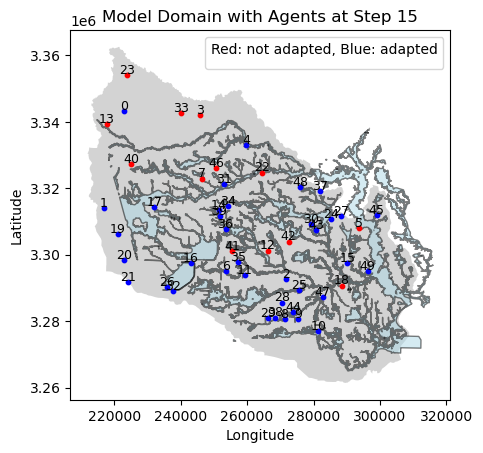

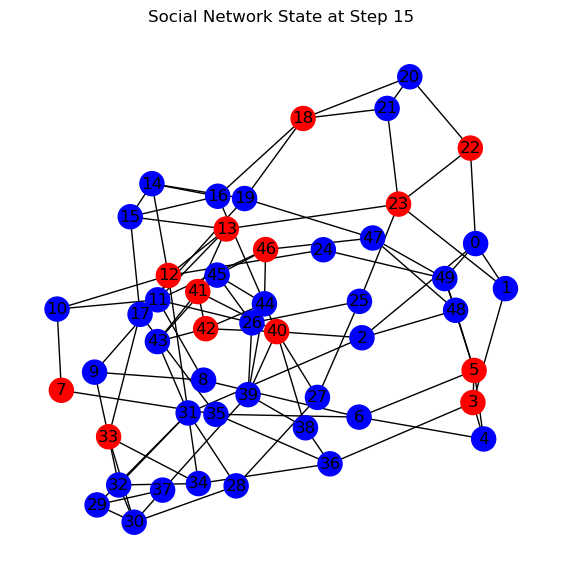

<Figure size 1000x600 with 0 Axes>

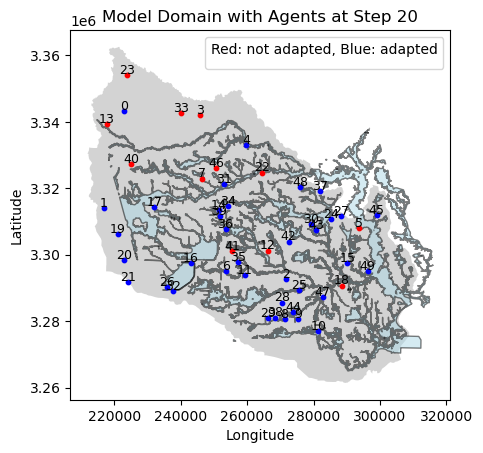

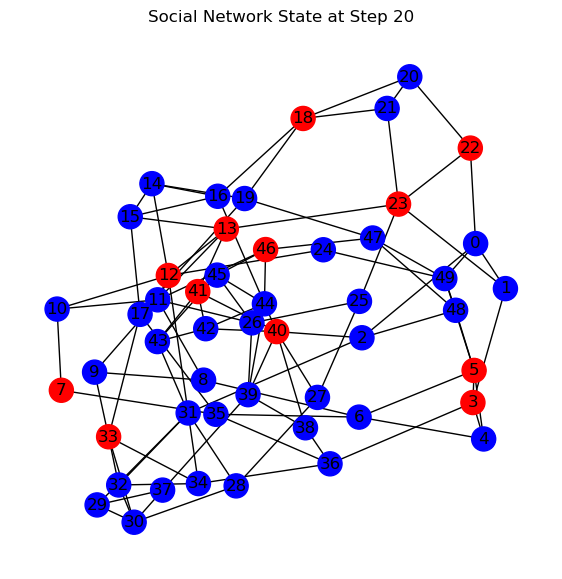

In [18]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx


# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()
        


In [19]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.859245              0.621813          0.000000   
     1                   0.355984              0.467961          0.000000   
     2                   1.040275              0.655194          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   2.237404              0.788908          0.000000   
...                           ...                   ...               ...   
19   45                  0.239016              0.398408          0.240071   
     46                  0.000000              0.000000          0.000000   
     47                  0.885192              0.627007          0.880324   
     48                  0.568491              0.549691          0.481417   
     49                  3.544171              0.869222          2.675074   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID                                               
0    0                 0.000000      False             4   
     1                 0.000000      False             3   
     2                 0.000000      False             4   
     3                 0.000000      False             4   
     4                 0.000000      False             3   
...                         ...        ...           ...   
19   45                0.399177       True             4   
     46                0.000000      False             4   
     47                0.626045       True             4   
     48                0.520664       True             4   
     49                0.820102       True             5   

                                                   location  
Step AgentID                                                 
0    0          POINT (222954.4950685077 3343238.694460969)  
     1         POINT (216770.84908889953 3313997.303854665)  
     2          POINT (271688.7095874084 3292596.548611502)  
     3         POINT (245908.5678575141 3342089.6080314307)  
     4        POINT (259680.94318564373 3333029.2576682083)  
...                                                     ...  
19   45         POINT (298955.6630018974 3311896.673552079)  
     46         POINT (250633.0748256362 3326131.334025526)  
     47       POINT (282791.87213500985 3287254.5873494204)  
     48          POINT (276026.3302910788 3320358.62020641)  
     49       POINT (296337.22886110307 3295155.9466778184)  

[1000 rows x 7 columns]

In [20]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,4
2,11
3,15
4,19
5,24
6,27
7,29
8,31
9,32


In [21]:
from agents import Households
import pandas as pd

# Retrieve income classes of households
income_classes = [agent.income_class for agent in model.schedule.agents if isinstance(agent, Households)]

# Display income classes in a table
income_table = pd.DataFrame({'Income Class': income_classes})
display(income_table)

# Print count per income class
income_counts = income_table['Income Class'].value_counts()
print("\nCount per Income Class:")
print(income_counts)

,Income Class
0,low
1,middle
2,low
3,middle
4,middle
5,high
6,middle
7,low
8,middle
9,high



Count per Income Class:
Income Class
high      20
middle    17
low       13
Name: count, dtype: int64
